# Polynomial Regression, Underfitting, Overfitting

Simulate:

$$y = a_0 + a_1x +a_2x^2 + \epsilon$$

$$\epsilon \sim \mathcal{N} (0, 1)$$

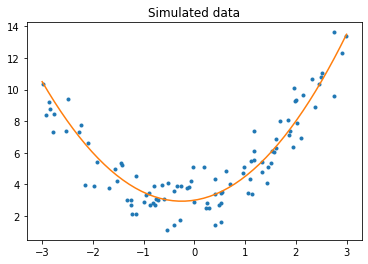

In [39]:
import numpy as np
import matplotlib.pyplot as plt

samples = 100

#Kolonnmatris / radvektor
X = np.random.uniform(-3, 3, (samples, 1))

f = lambda x: x**2 + .5*x + 3
y = f(X) + np.random.randn(samples, 1)

plt.plot(X, y, ".")

x = np.linspace(-3, 3)
plt.plot(x, f(x))
_ = plt.title("Simulated data")

### Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 2, include_bias=False)

poly_X = polynomial_features.fit_transform(X) # We are training (both fitting and transforming at the same time) 
# Here we are allowed to also use fit_transform on the test data

poly_X[:3] # Order: 1, x, x^2 (?)

array([[-3.57347538e-02,  1.27697263e-03],
       [ 1.83883170e+00,  3.38130202e+00],
       [ 2.13549943e+00,  4.56035782e+00]])

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_X, y)

model.coef_

array([[0.63854895, 0.94906811]])

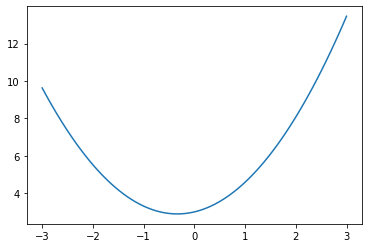

In [42]:
x = np.linspace(-3, 3, samples).reshape(samples, 1)

x_poly_features = polynomial_features.transform(x) # We transform x to a polynomial feature since we have a polynomial model

y_pred = model.predict(x_poly_features) # Predicts the y-value using the transformed x (created above)

plt.plot(x, y_pred)